In [2]:
# list of column names ofr the dataset
list_cols = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d',\
             'word_freq_our','word_freq_over','word_freq_remove','word_freq_internet',\
             'word_freq_order','word_freq_mail','word_freq_receive','word_freq_will',\
             'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free',\
             'word_freq_business','word_freq_email','word_freq_you','word_freq_credit',\
             'word_freq_your','word_freq_font','word_freq_000','word_freq_money',\
             'word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650',\
             'word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',\
             'word_freq_data','word_freq_415','word_freq_85','word_freq_technology',\
             'word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct',\
             'word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',\
             'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference',\
             'char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$',\
             'char_freq_#','capital_run_length_average','capital_run_length_longest',\
             'capital_run_length_total','class']

In [3]:
import pandas as pd

# reading the dataset
df = pd.read_csv('/content/spambase.data',header=None)

# adding the column headers through a list as the original dataset doesn't contain headers
df.columns = list_cols
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
# Identify rows with the specified class
class_rows = df[df['class'] == 1]

# Keep only 8% of the rows for the spam class
sample_spam = class_rows.sample(frac=0.08, random_state=42)

# Filter out the rows with the specified class
full_non_spam = df[df['class'] != 1]

# Concatenate the remaining rows with the filtered data
final_df = pd.concat([full_non_spam, sample_spam])

print('Transfromed dataframe shape:\n', final_df.shape)
print('\nOriginal dataframe class distribution:\n', df['class'].value_counts(normalize=True) * 100)
print('\nTransfromed dataframe class distribution:\n', final_df['class'].value_counts(normalize=True) * 100)

Transfromed dataframe shape:
 (2933, 58)

Original dataframe class distribution:
 0    60.595523
1    39.404477
Name: class, dtype: float64

Transfromed dataframe class distribution:
 0    95.056256
1     4.943744
Name: class, dtype: float64


In [5]:
# Separate features (X) and labels (y)
X = final_df.drop('class', axis=1)
y = final_df['class']

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [7]:
len(X_train), len(X_test), len(X_val), len(y_train), len(y_test), len(y_val)

(2053, 440, 440, 2053, 440, 440)

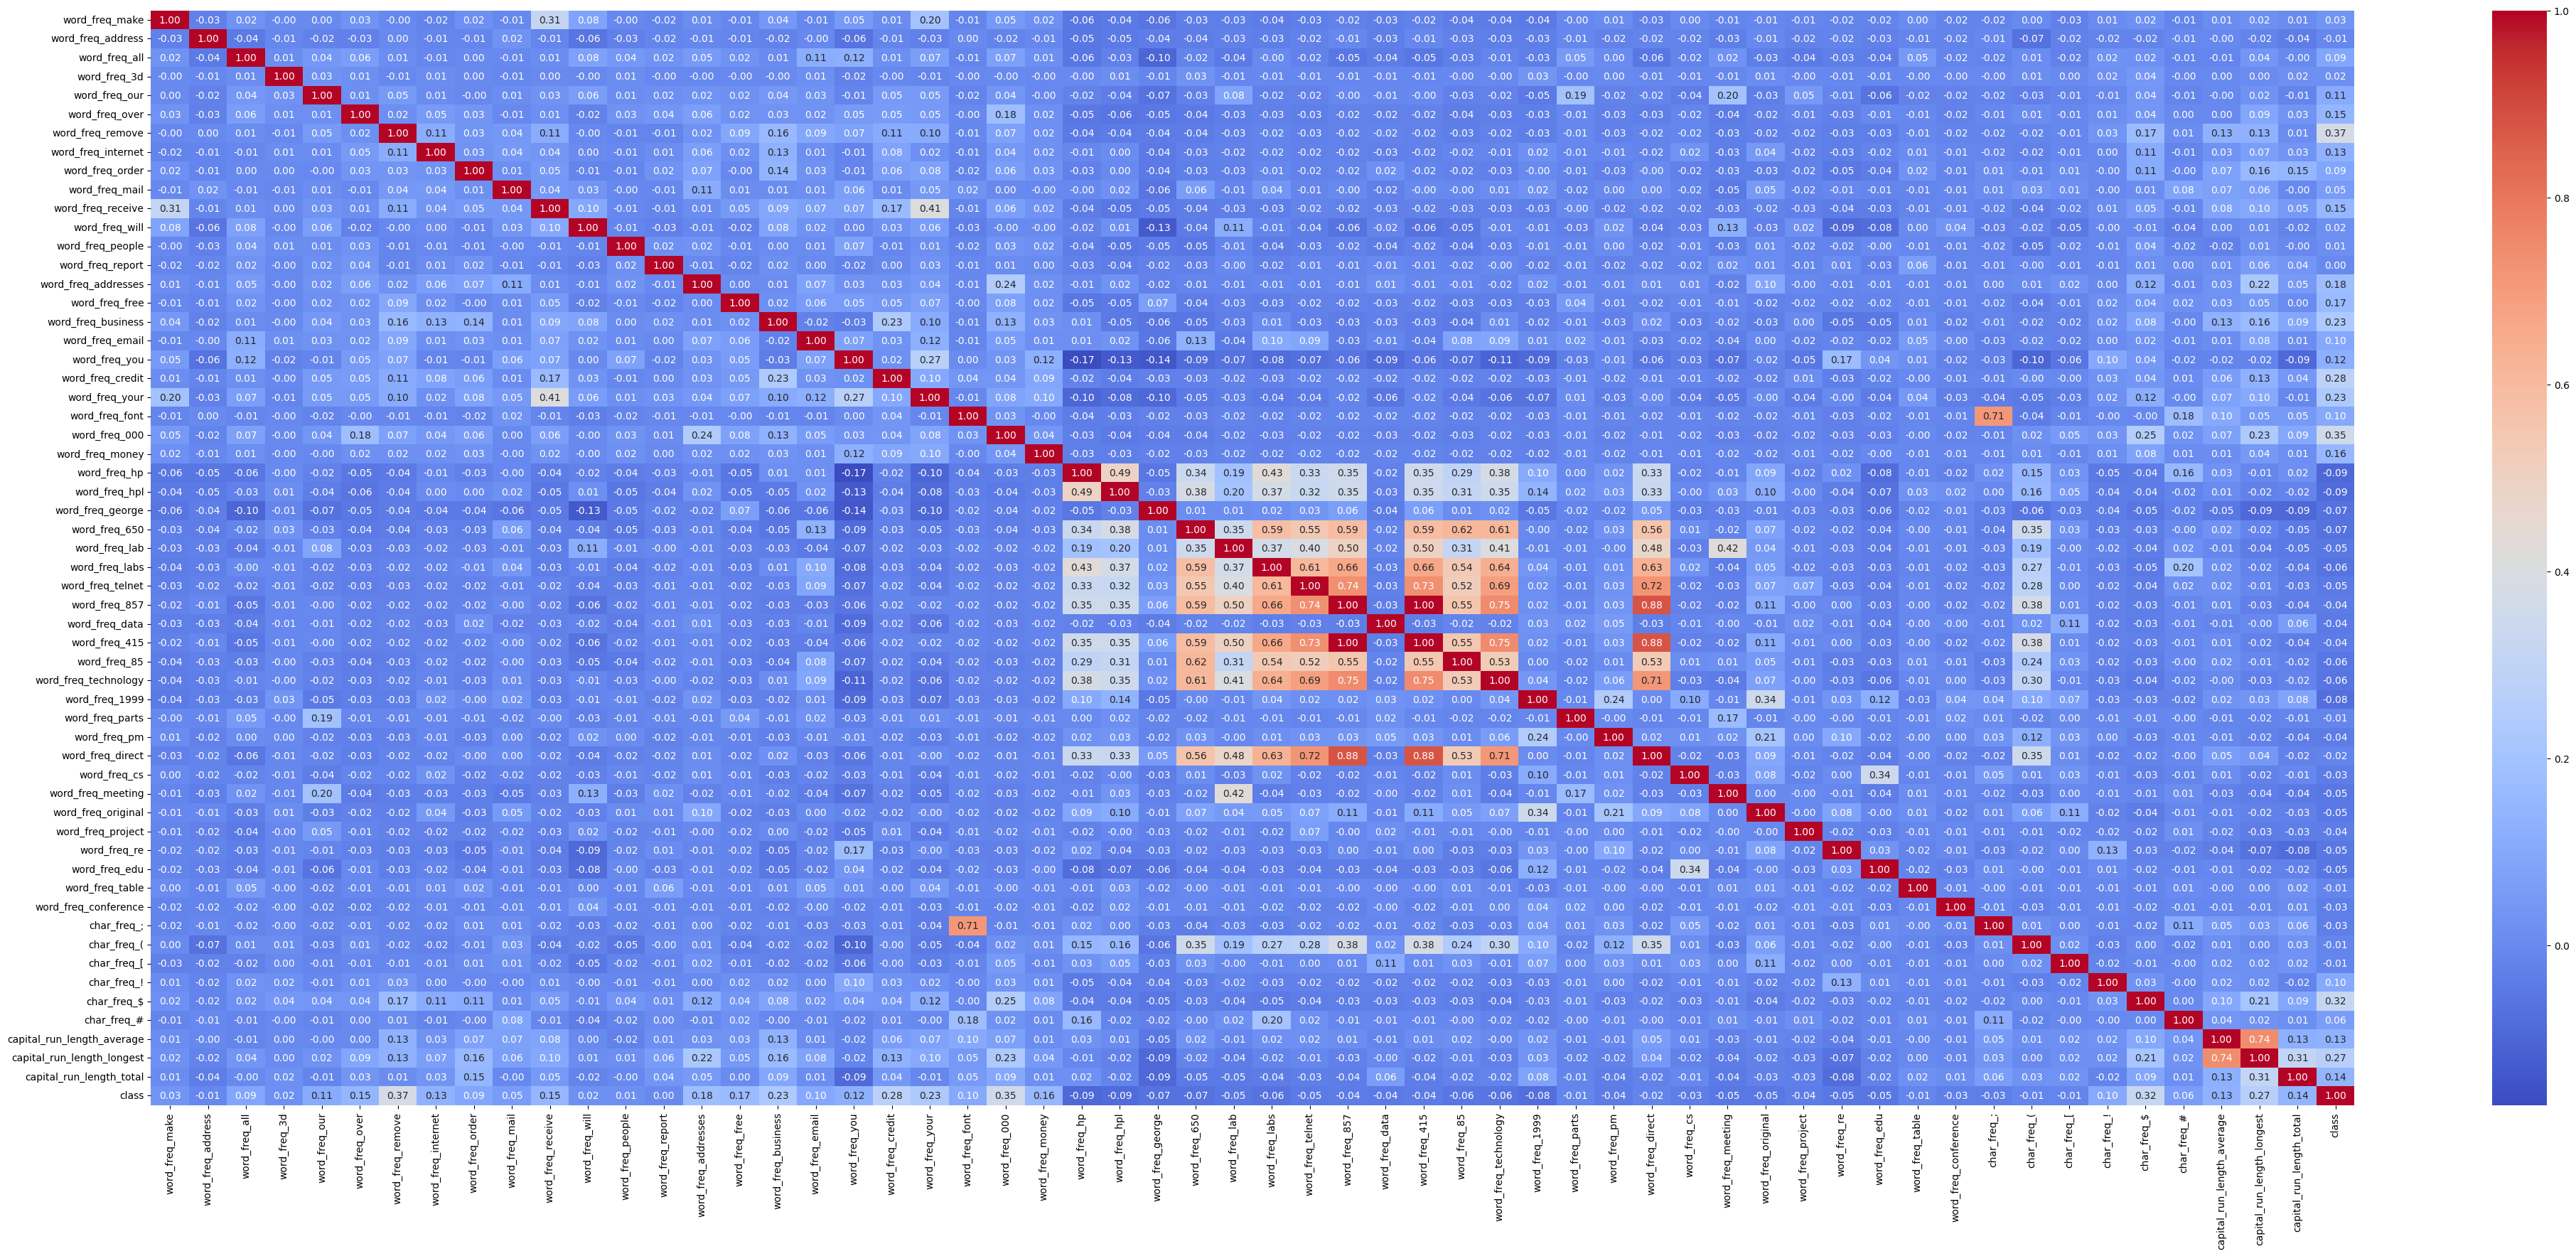

In [8]:
# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = final_df.corr()
plt.figure(figsize=(50, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [9]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Example using RandomForest for feature importance
model = RandomForestClassifier()
selector = SelectFromModel(model)
selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]

In [10]:
print(selected_features)

Index(['word_freq_all', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_will', 'word_freq_free', 'word_freq_business',
       'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_000',
       'word_freq_money', 'char_freq_(', 'char_freq_!', 'char_freq_$',
       'capital_run_length_average', 'capital_run_length_longest',
       'capital_run_length_total'],
      dtype='object')


In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_val_scaled = scaler.fit_transform(X_val[selected_features])
X_test_scaled = scaler.fit_transform(X_test[selected_features])

# Build the autoencoder model
input_dim = X[selected_features].shape[1]
encoding_dim = 32
hidden_dim = 16

autoencoder = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(encoding_dim, activation='relu'),
    tf.keras.layers.Dense(hidden_dim, activation='relu'),
    tf.keras.layers.Dense(encoding_dim, activation='relu'),
    tf.keras.layers.Dense(input_dim, activation='sigmoid')
])

# Mean Squared Error (MSE) as loss function
autoencoder.compile(optimizer='adam', loss='mse')

In [12]:
# Train the autoencoder on normal data
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32, shuffle=True, validation_data=(X_val_scaled, X_val_scaled), verbose=1)

Epoch 1/50
65/65 [==============================] - 2s 5ms/step - loss: 1.1872 - val_loss: 1.0764
Epoch 2/50
65/65 [==============================] - 0s 3ms/step - loss: 0.9912 - val_loss: 0.9369
Epoch 3/50
65/65 [==============================] - 0s 3ms/step - loss: 0.9117 - val_loss: 0.8943
Epoch 4/50
65/65 [==============================] - 0s 3ms/step - loss: 0.8658 - val_loss: 0.8591
Epoch 5/50
65/65 [==============================] - 0s 3ms/step - loss: 0.8316 - val_loss: 0.8301
Epoch 6/50
65/65 [==============================] - 0s 3ms/step - loss: 0.8067 - val_loss: 0.8123
Epoch 7/50
65/65 [==============================] - 0s 3ms/step - loss: 0.7914 - val_loss: 0.7957
Epoch 8/50
65/65 [==============================] - 0s 3ms/step - loss: 0.7781 - val_loss: 0.7883
Epoch 9/50
65/65 [==============================] - 0s 3ms/step - loss: 0.7702 - val_loss: 0.7827
Epoch 10/50
65/65 [==============================] - 0s 3ms/step - loss: 0.7646 - val_loss: 0.7788
Epoch 11/50
65/65 [

In [13]:
# Make predictions on the test set
reconstruction = autoencoder.predict(X_val_scaled)

14/14 [==============================] - 0s 2ms/step


In [14]:
import numpy as np

# Calculate reconstruction error (MSE)
mse = np.mean(np.square(X_val_scaled - reconstruction), axis=1)

# Set a threshold for anomaly detection based on the reconstruction error
threshold = np.percentile(mse, 97)

# Identify anomalies based on the threshold
anomalies = (mse > threshold).astype(int)

In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the model on the validation set
print("Validation Classification Report:")
print(classification_report(y_val, anomalies))

print("Validation Accuracy Score:", round(accuracy_score(y_val, anomalies),2))

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, anomalies))

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       414
           1       0.57      0.31      0.40        26

    accuracy                           0.95       440
   macro avg       0.76      0.65      0.69       440
weighted avg       0.93      0.95      0.94       440

Validation Accuracy Score: 0.95
Validation Confusion Matrix:
[[408   6]
 [ 18   8]]


In [38]:
# Make predictions on the test set
reconstruction = autoencoder.predict(X_test_scaled)

import numpy as np

# Calculate reconstruction error (MSE)
mse = np.mean(np.square(X_test_scaled - reconstruction), axis=1)

# Set a threshold for anomaly detection based on the reconstruction error
threshold = np.percentile(mse, 87)

# Identify anomalies based on the threshold
anomalies = (mse > threshold).astype(int)

14/14 [==============================] - 0s 2ms/step


In [39]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Evaluate the model on the test set
print("Test Classification Report:")
print(classification_report(y_test, anomalies))

print("Test Accuracy Score:", round(accuracy_score(y_test, anomalies),2))

print("Test Confusion Matrix:")
print(confusion_matrix(y_test, anomalies))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.94       420
           1       0.22      0.65      0.33        20

    accuracy                           0.88       440
   macro avg       0.60      0.77      0.63       440
weighted avg       0.95      0.88      0.91       440

Test Accuracy Score: 0.88
Test Confusion Matrix:
[[375  45]
 [  7  13]]


In [50]:
print(anomalies.tolist())
print(y_test.tolist())

print(X_test[selected_features].iloc[[2, 14]])

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

AUC-PR: 0.44502351097178683


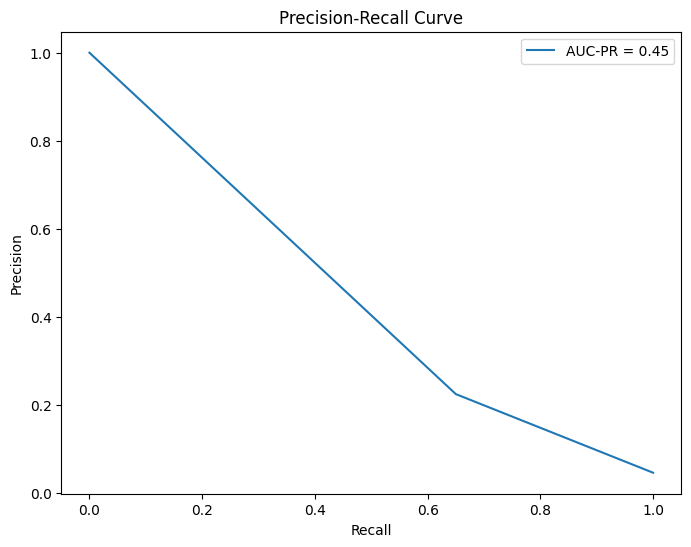

In [87]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, anomalies)

# Calculate AUC-PR
auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC-PR = {auc_pr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

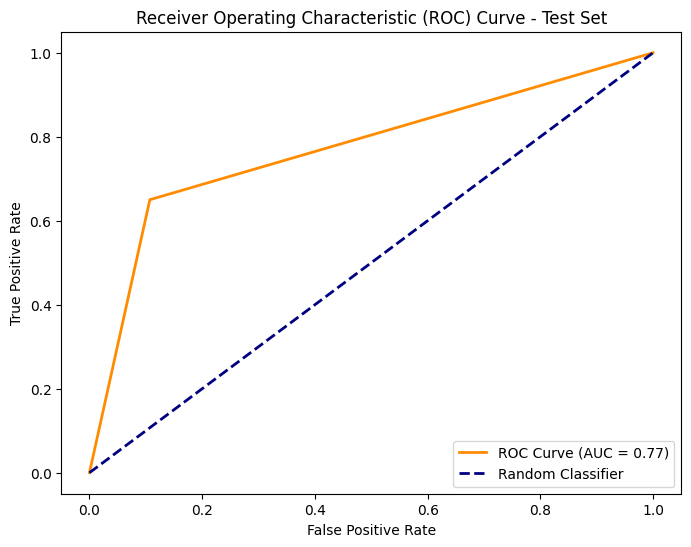

In [88]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, anomalies)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

In [53]:
import joblib

# Save the trained model to a file
joblib.dump(autoencoder, 'spam_detection_model_autoencoder.joblib')

['spam_detection_model_autoencoder.joblib']